In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import unidecode
import nltk
import pandas as pd

from tensorflow import keras
from keras.preprocessing.text import text_to_word_sequence
from gensim.parsing.preprocessing import remove_stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv("train.csv")
dataset.head()



,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
test_set = pd.read_csv("test.csv")

In [4]:
target_category = dataset["target"].unique()
target_category=list(map(str,target_category))
print(target_category)

['1', '0']


In [5]:
print(len(dataset))
print(len(test_set))

7613
3263


In [6]:
dataset = dataset[['text','target']]
dataset.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


<AxesSubplot:xlabel='target'>

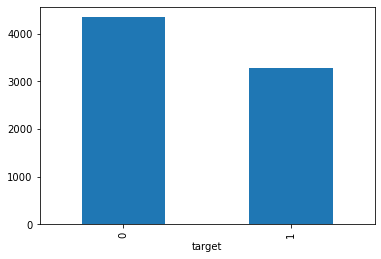

In [7]:
dataset.groupby("target").target.count().plot.bar(ylim=0)

In [8]:
text = dataset["text"]
text.head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [9]:
print(text.iloc[31])

@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C


# Text Preprocessing

In [10]:
def processing(text): 
    
    #for row in text:
    
#tokenization using keras text to word sequence tokenizer
    tokenized_text = text_to_word_sequence(text)
    #print(tokenized_text)
        
#stop word removal using remove_stopwords from gensim
    text = ' '.join(tokenized_text)
    text = text.replace("'", "")
    stop_word_removed_text = remove_stopwords(text)
    #print(stop_word_removed_text)
        
#remove numbers
    number_removed_text = new_string = ''.join(filter(lambda x: not x.isdigit(), stop_word_removed_text))
    #print(number_removed_text)
        
#remove extra white spaces
    extra_whitespace_removed = word_tokenize(number_removed_text)
    extra_whitespace_removed = number_removed_text.split()
    #print(extra_whitespace_removed)
        
    extra_whitespace_removed = ' '.join(extra_whitespace_removed)
    #print(extra_whitespace_removed)
        
#Convert Accented Characters(û -> u)
    accented_removed_text = unidecode.unidecode(extra_whitespace_removed)
    #print(accented_removed_text)
        
#lemmatization
    lemmatizer = WordNetLemmatizer()

    def get_wordnet_pos(word):
        """Map POS tag to first character lemmatize() accepts"""
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}

        return tag_dict.get(tag, wordnet.NOUN)

    lem_input = nltk.word_tokenize(accented_removed_text)
    lem_text= ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in lem_input])
    #print(lem_text)
       
#stemming 
    stemmer= PorterStemmer()

    stem_input= nltk.word_tokenize(lem_text)
    stem_text=' '.join([stemmer.stem(word) for word in stem_input])
    #print(stem_text) 
        
#remove single letters
    preprocessed_text = ' '.join( [w for w in stem_text.split() if len(w)>1] )
    #print(preprocessed_text)
        
    return preprocessed_text
        
dataset['text']=dataset['text'].apply(processing)  

In [11]:
text = dataset['text']
text.head(10)

0                   deed reason earthquak allah forgiv
1                      forest near la rong sask canada
2    resid ask shelter place notifi offic evacu she...
3          peopl receiv wildfir evacu order california
4    get sent photo rubi alaska smoke wildfir pour ...
5    rockyfir updat california hwi close direct lak...
6    flood disast heavi rain caus flash flood stree...
7                                         im hill wood
8                there emerg evacu happen build street
9                          im afraid tornado come area
Name: text, dtype: object

In [12]:
target = dataset["target"]
target.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(text,target, test_size = 0.3, random_state = 60,shuffle=True)

print(len(X_train))
print(len(X_test))

5329
2284


# 1. Naive Bayes Classifier


In [14]:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train,Y_train)

test_predict = nb.predict(X_test)

train_accuracy = round(nb.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)


print("Naive Bayes Train Accuracy Score : {}% ".format(train_accuracy ))
print("Naive Bayes Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, Y_test, target_names=target_category))

Naive Bayes Train Accuracy Score : 91% 
Naive Bayes Test Accuracy Score  : 79% 

              precision    recall  f1-score   support

           1       0.89      0.78      0.84      1529
           0       0.65      0.81      0.72       755

    accuracy                           0.79      2284
   macro avg       0.77      0.80      0.78      2284
weighted avg       0.81      0.79      0.80      2284



# 2. Support Vector Machine

In [15]:
sgd = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', SGDClassifier()),
               ])

sgd.fit(X_train, Y_train)

test_predict = sgd.predict(X_test)

train_accuracy = round(sgd.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)

print("SVM Train Accuracy Score : {}% ".format(train_accuracy ))
print("SVM Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, Y_test, target_names=target_category))

SVM Train Accuracy Score : 97% 
SVM Test Accuracy Score  : 77% 

              precision    recall  f1-score   support

           1       0.81      0.80      0.81      1360
           0       0.72      0.73      0.72       924

    accuracy                           0.77      2284
   macro avg       0.76      0.77      0.77      2284
weighted avg       0.77      0.77      0.77      2284



# 3.Decision Trees

In [16]:
dt = Pipeline([('tfidf', TfidfVectorizer()),
                ('dt', DecisionTreeClassifier()),
               ])

dt.fit(X_train, Y_train)

test_predict = dt.predict(X_test)

train_accuracy = round(dt.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)

print("Decision Tree Train Accuracy Score : {}% ".format(train_accuracy ))
print("Decision Tree Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, Y_test, target_names=target_category))

Decision Tree Train Accuracy Score : 100% 
Decision Tree Test Accuracy Score  : 73% 

              precision    recall  f1-score   support

           1       0.77      0.77      0.77      1344
           0       0.67      0.67      0.67       940

    accuracy                           0.73      2284
   macro avg       0.72      0.72      0.72      2284
weighted avg       0.73      0.73      0.73      2284



# 4. K-Nearest Neighbours

In [17]:
knn = Pipeline([('tfidf', TfidfVectorizer()),
                ('knn', KNeighborsClassifier(n_neighbors=5, metric='euclidean')),
               ])

knn.fit(X_train, Y_train)

test_predict = knn.predict(X_test)

train_accuracy = round(knn.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)

print("K-Nearest Neighbour Train Accuracy Score : {}% ".format(train_accuracy ))
print("K-Nearest Neighbour Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, Y_test, target_names=target_category))

K-Nearest Neighbour Train Accuracy Score : 83% 
K-Nearest Neighbour Test Accuracy Score  : 76% 

              precision    recall  f1-score   support

           1       0.93      0.73      0.82      1693
           0       0.52      0.83      0.64       591

    accuracy                           0.76      2284
   macro avg       0.72      0.78      0.73      2284
weighted avg       0.82      0.76      0.77      2284



# 5. Random Forest Classifier

In [18]:
rfc = Pipeline([('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_estimators=100)),
               ])

rfc.fit(X_train, Y_train)

test_predict = rfc.predict(X_test)

train_accuracy = round(rfc.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)

print("Random Forest Classifier Train Accuracy Score : {}% ".format(train_accuracy ))
print("Random Forest Classifier Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, Y_test, target_names=target_category))

Random Forest Classifier Train Accuracy Score : 100% 
Random Forest Classifier Test Accuracy Score  : 78% 

              precision    recall  f1-score   support

           1       0.88      0.78      0.83      1521
           0       0.64      0.79      0.71       763

    accuracy                           0.78      2284
   macro avg       0.76      0.79      0.77      2284
weighted avg       0.80      0.78      0.79      2284



# Test Data

In [19]:
test_set.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [20]:
test_set['text'] = test_set['text'].apply(processing)

test_id = test_set['id']
test_text = test_set['text']
y_prdict = nb.predict(test_text)

In [21]:
submission = pd.DataFrame(list(zip(test_id, y_prdict)),
               columns =['id', 'target'])
submission.head(20)

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
5,12,1
6,21,0
7,22,0
8,27,0
9,29,0
